# Microbiome Analysis and Figure Creation for: 
**Characterization of gut microbiome and metabolome in *Helicobacter pylori* patients in an underprivileged community in the Unites States**
- Brian White, John Sterrett, Zoya Grigoryan, Lauren T. Lally, Jared D. Heinze, Hyder Alikhan, Christopher A. Lowry, Lark Perez, Joshua DeSipio, Sangita Phadtare

- Code seen here was written by John Sterrett

**A NOTE:** Initial microbiome processing was performed in 2019 and not by me (maybe by ?Jared Heinze?). Steps taken prior to my analysis are described in the methods section of the paper, but they can also be seen by opening a .qza or .qzv file provided at [view.qiime2.org](view.qiime2.org) and looking under the provenance tab. Clicking on each step will show the commands and parameters given to QIIME2 that produced all files I worked with. I have provided one qzv file in this repository for doing so.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sys
from qiime2 import Visualization, Artifact, Metadata
%matplotlib inline

In [2]:
sys.version

'3.6.12 | packaged by conda-forge | (default, Dec  9 2020, 00:24:39) \n[GCC Clang 11.0.0]'

In [4]:
%cd ../Sangita_HP_Archive2/
%ls

/Users/johnsterrett/Research-Projects/Boulder/Phadtare/Sangita_HP_Archive2
ALL HELICO DATA.xlsx               faith_pd_groups_2.qzv
LEFSe_data.tsv                     feature-stats/
LEFSe_data_2.tsv                   l5-ancom-Hpy.qzv
LEfSe_output.lefse_internal_res    l6-ancom-Hpy.qzv
LEfSe_output_2.lefse_internal_res  level-7 H pylori.csv
Supplemental-analyses.html         level-7 H pylori.xlsx
Volcano-pathway.png                mapping.tsv*
Volcano-sat.png                    mapping_no_cppi_na.tsv
__pycache__/                       metabolomics_data.csv
chao1_rarefaction.qzv              metabolomics_data.xlsx
chao1_vector.qza                   metaboresults.csv
composition-table.qza              otus_corr_2.qzv
core-metrics-results/              otus_corr_mapping.tsv
core-metrics-results-2/            otus_groups_2.qzv
corrstats.py                       otus_mapping.tsv
emperor-Hpy-unwu.png               procrustes-fig.png
emperor-Hpy.png                    pseudo-table-l5.qza
faith

In [32]:
%ls core-metrics-results/

alpha-rarefaction.qzv*                  rarefied_table.qza*
bray_curtis_distance_matrix.qza*        shannon-corr.qzv
bray_curtis_emperor.qzv*                shannon-stats.qzv
bray_curtis_pcoa_results.qza*           shannon_vector.qza*
evenness_vector.qza*                    unifrac-Sex.qzv*
faith_pd_vector.qza*                    unweighted_unifrac_distance_matrix.qza*
faithstat.qzv*                          unweighted_unifrac_emperor.qzv*
jaccard_distance_matrix.qza*            unweighted_unifrac_pcoa_results.qza*
jaccard_emperor.qzv*                    weighted_unifrac_distance_matrix.qza*
jaccard_pcoa_results.qza*               weighted_unifrac_emperor.qzv*
observed_otus_vector.qza*               weighted_unifrac_pcoa_results.qza*


In [4]:
!qiime info

System versions
Python version: 3.6.12
QIIME 2 release: 2020.11
QIIME 2 version: 2020.11.1
q2cli version: 2020.11.1

Installed plugins
alignment: 2020.11.1
composition: 2020.11.1
cutadapt: 2020.11.1
dada2: 2020.11.1
deblur: 2020.11.1
demux: 2020.11.1
diversity: 2020.11.1
diversity-lib: 2020.11.1
emperor: 2020.11.1
feature-classifier: 2020.11.1
feature-table: 2020.11.1
fragment-insertion: 2020.11.1
gneiss: 2020.11.1
longitudinal: 2020.11.1
metadata: 2020.11.1
phylogeny: 2020.11.1
quality-control: 2020.11.1
quality-filter: 2020.11.1
sample-classifier: 2020.11.1
taxa: 2020.11.1
types: 2020.11.1
vsearch: 2020.11.1

Application config directory
/opt/anaconda3/envs/qiime2-2020.11/var/q2cli

Getting help
To get help with QIIME 2, visit https://qiime2.org


# Alpha Diversity
## Faith's phylogenetic diversity 
### Categorical

In [140]:
! qiime diversity alpha-group-significance \
--i-alpha-diversity core-metrics-results/faith_pd_vector.qza \
--m-metadata-file mapping.tsv \
--o-visualization faith_pd_groups_2.qzv

Saved Visualization to: faith_pd_groups_2.qzv


The file `faith_mapping.tsv` was exported from the qiime visualization.

In [5]:
faith_df = pd.read_csv("faith_mapping.tsv", 
                       sep = "\t")
faith_df.drop(0, inplace = True)

faith_df["faith_pd"] = faith_df["faith_pd"].astype(float)

In [6]:
faith_df.head()

,id,Sex,Age_cat,Smoke,Alcohol,Drinksperday,PastHpyloritrt,Complabxhppast,Pastuseppi,Currppiuse,Abxrespgynpastyear,Abxrespgynuse,Periodontalpastyear,Duodenalulcer,Nonulcerdyspepsia,Current_H_pylori,IBS,faith_pd
1,21,M,over 40,Y,N,NaN,N,N,N,Y,Y,"1,_3,_4,_8",Y,N,Y,Yes,No,7.266649
2,22,F,over 40,N,N,NaN,N,N,N,N,Y,"3,_4",Y,N,Y,Yes,No,8.081708
3,23,M,over 40,N,Y,1x_a_week,N,N,Y,Y,Y,"3,_4",N,N,Y,Yes,No,10.427738
4,24,M,over 40,N,N,NaN,N,N,N,N,N,0,N,N,Y,Yes,No,11.588203
5,25,M,over 40,N,N,NaN,N,N,N,N,N,0,N,N,Y,Yes,No,12.252288


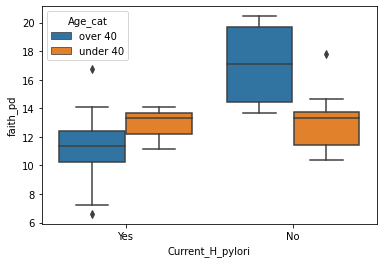

In [7]:
sns.boxplot(x="Current_H_pylori",
            y="faith_pd",
            hue="Age_cat",
            data=faith_df)

Kolmogorov-Smirnov test shows that the data is not normally distributed, so a Kruskal-Wallis test is performed on the Faith diversity of old vs yound current H pylori patients. It shows that the differences between old and young h pylori pts faith diversity is not statistically significant.

In [8]:
oldH = faith_df.loc[(faith_df["Current_H_pylori"]=="Yes") & 
                    (faith_df["Age_cat"]=="over 40")]
youngH = faith_df.loc[(faith_df["Current_H_pylori"]=="Yes") & 
                     (faith_df["Age_cat"]=="under 40")]


print(stats.kstest(oldH["faith_pd"], "norm"))

print(stats.kruskal(oldH["faith_pd"],
              youngH["faith_pd"]))

KstestResult(statistic=0.9999999999797488, pvalue=1.6005073887953952e-171)
KruskalResult(statistic=1.0125000000000028, pvalue=0.3143046604738504)


### Numeric

In [9]:
! qiime diversity alpha-correlation \
--i-alpha-diversity core-metrics-results/faith_pd_vector.qza \
--m-metadata-file mapping.tsv \
--o-visualization faith_pd_corr_2.qzv

Saved Visualization to: faith_pd_corr_2.qzv


In [9]:
faith_df2 = pd.read_csv("faith_corr_mapping.tsv", 
                       sep = "\t")
faith_df2.drop(0, inplace = True)

faith_df2["faith_pd"] = faith_df2["faith_pd"].astype(float)
faith_df2["Age"] = faith_df2["Age"].astype(float)

In [10]:
faith_full_df = pd.concat([faith_df,
                      faith_df2.loc[:,:"Drinksperweek"]],
                     axis=1)

(0.5, 5.5)

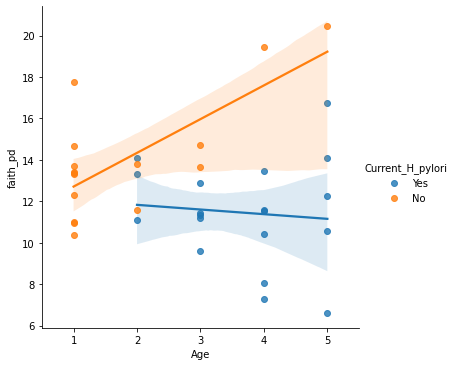

In [11]:
ax = sns.lmplot(x="Age",
               y="faith_pd",
               hue="Current_H_pylori",
               data = faith_full_df)
plt.gca().set_xlim((0.5,5.5))

In [120]:
! wget https://raw.githubusercontent.com/psinger/CorrelationStats/master/corrstats.py


--2021-02-04 10:45:39--  https://raw.githubusercontent.com/psinger/CorrelationStats/master/corrstats.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.68.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.68.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4465 (4.4K) [text/plain]
Saving to: ‘corrstats.py’

corrstats.py        100%[===================>]   4.36K  --.-KB/s    in 0s      

2021-02-04 10:45:40 (9.44 MB/s) - ‘corrstats.py’ saved [4465/4465]



In [12]:
from corrstats import independent_corr

(-0.8912799047605414, 0.3749185174912557)
(1.0171097212822693, 0.3091012362386931)


In [13]:
noH = faith_full_df.loc[(faith_full_df["Current_H_pylori"]=="No")]
H = faith_full_df.loc[(faith_df["Current_H_pylori"]=="Yes")]

noH_coef = stats.spearmanr(noH["Age"],
                           noH["faith_pd"])[0]

H_coef = stats.spearmanr(H["Age"],
                         H["faith_pd"])[0]


z, p = independent_corr(noH_coef,
                        H_coef,
                        noH.shape[0],
                        H.shape[0])
print(f"control correlation coefficient: {noH_coef}\nH pylori correlation coefficient: {H_coef} \nFisher transformation pval: {p}")

control correlation coefficient: 0.5705802854741558
H pylori correlation coefficient: -0.03546128667045267 
Fisher transformation pval: 0.06703078900864456


## Observed OTUs
### Categorical

In [151]:
! qiime diversity alpha-group-significance \
--i-alpha-diversity core-metrics-results/observed_otus_vector.qza \
--m-metadata-file mapping.tsv \
--o-visualization otus_groups_2.qzv

Saved Visualization to: otus_groups_2.qzv


In [14]:
otus_df = pd.read_csv("otus_mapping.tsv", 
                       sep = "\t")
otus_df.drop(0, inplace = True)

otus_df["observed_otus"] = otus_df["observed_otus"].astype(float)

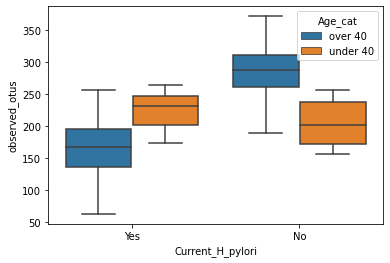

In [15]:
sns.boxplot(x="Current_H_pylori",
            y="observed_otus",
            hue="Age_cat",
            data=otus_df)

In [16]:
oldH = otus_df.loc[(otus_df["Current_H_pylori"]=="Yes") & 
                    (otus_df["Age_cat"]=="over 40")]
youngH = otus_df.loc[(otus_df["Current_H_pylori"]=="Yes") & 
                     (otus_df["Age_cat"]=="under 40")]

print(stats.kstest(oldH["observed_otus"], "norm"))

print(stats.kruskal(oldH["observed_otus"],
                    youngH["observed_otus"]))

KstestResult(statistic=1.0, pvalue=0.0)
KruskalResult(statistic=3.20000000000001, pvalue=0.07363827012030244)


### Numeric

In [18]:
! qiime diversity alpha-correlation \
--i-alpha-diversity core-metrics-results/observed_otus_vector.qza \
--m-metadata-file mapping.tsv \
--o-visualization otus_corr_2.qzv

Saved Visualization to: otus_corr_2.qzv


In [17]:
otu_df2 = pd.read_csv("otus_corr_mapping.tsv", 
                       sep = "\t")
otu_df2.drop(0, inplace = True)

otu_df2["observed_otus"] = otu_df2["observed_otus"].astype(float)
otu_df2["Age"] = otu_df2["Age"].astype(float)

In [18]:
otus_full_df = pd.concat([otus_df,
                      otu_df2.drop("observed_otus", axis=1)],
                      axis=1)

(0.5, 5.5)

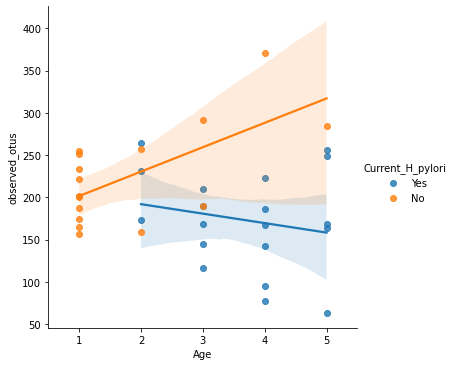

In [19]:
ax = sns.lmplot(x="Age",
               y="observed_otus",
               hue="Current_H_pylori",
               data = otus_full_df)
plt.gca().set_xlim((0.5,5.5))

(0.5, 5.5)

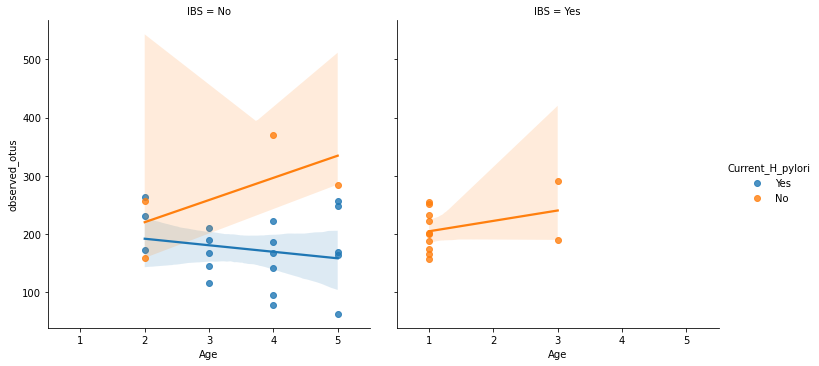

In [20]:
ax = sns.lmplot(x="Age",
               y="observed_otus",
               hue="Current_H_pylori",col="IBS",
               data = otus_full_df)
plt.gca().set_xlim((0.5,5.5))

In [21]:
noH = otus_full_df.loc[(otus_full_df["Current_H_pylori"]=="No")]
H = otus_full_df.loc[(otus_df["Current_H_pylori"]=="Yes")]

noH_coef = stats.spearmanr(noH["Age"],
                           noH["observed_otus"])[0]

H_coef = stats.spearmanr(H["Age"],
                         H["observed_otus"])[0]


z, p = independent_corr(noH_coef,
                        H_coef,
                        noH.shape[0],
                        H.shape[0])
print(f"control correlation coefficient: {noH_coef}\nH pylori correlation coefficient: {H_coef} \nFisher transformation pval: {p}")

control correlation coefficient: 0.5045487390839717
H pylori correlation coefficient: -0.20640287369725016 
Fisher transformation pval: 0.040536395777660106


## Chao 1

The core metrics calculations were performed on uuid `f64551ba-cda0-4419-8746-4e2f58e73be1` (thanks to the provenance tracking for allowing me to check this). According to the `peek` output below, that is `table.qza`.

In [208]:
! qiime tools peek feature-stats/table.qza

UUID:        f64551ba-cda0-4419-8746-4e2f58e73be1
Type:        FeatureTable[Frequency]
Data format: BIOMV210DirFmt


In [272]:
! qiime diversity alpha-rarefaction \
--i-table feature-stats/table.qza \
--p-max-depth 40000 \
--p-metrics chao1 \
--m-metadata-file mapping.tsv \
--o-visualization chao1_rarefaction.qzv

Saved Visualization to: chao1_rarefaction.qzv


In [269]:
! qiime diversity alpha \
--i-table core-metrics-results/rarefied_table.qza \
--p-metric chao1 \
--o-alpha-diversity chao1_vector.qza

Saved SampleData[AlphaDiversity] to: chao1_vector.qza


In [22]:
chao1 = Artifact.load("chao1_vector.qza")
chao1 = chao1.view(pd.Series)
chao1.index = [int(x) for x in chao1.index] #the index was a string, which was causing it to not
                                            #concat well with the dataframe

In [23]:
df = pd.read_csv("mapping.tsv", 
                 sep="\t",
                index_col="SampleID")
df.head()

,BarcodeSequence,LinkerPrimerSequence,PrimerPlate,Sex,Age,Age_cat,Educ,Race,Residencepastfiveyrs,Whereinusa,...,Currppiuse,Abxrespgynpastyear,Abxrespgynuse,Periodontalpastyear,Duodenalulcer,Nonulcerdyspepsia,Samplewell,Description,Current_H_pylori,IBS
SampleID,,,,,,,,,,,,,,,,,,,,,
21,TAGACCGACTCC,AA,7,M,4,over 40,2,4,1,1.0,...,Y,Y,"1,_3,_4,_8",Y,N,Y,A1,HB21,Yes,No
22,GGAATCCGATTA,AA,7,F,4,over 40,2,4,1,1.0,...,N,Y,"3,_4",Y,N,Y,B1,HB22,Yes,No
23,TCCGACCCGATC,AA,7,M,4,over 40,2,1,1,1.0,...,Y,Y,"3,_4",N,N,Y,C1,HB23,Yes,No
24,TCACTGCTAGGA,AA,7,M,4,over 40,2,1,1,1.0,...,N,N,0,N,N,Y,D1,HB24,Yes,No
25,ACATCAGGTCAC,AA,7,M,5,over 40,4,1,1,1.0,...,N,N,0,N,N,Y,E1,HB25,Yes,No


In [24]:
type(df.index[0]) == type(chao1.index[0])

True

In [25]:
df["chao1"] = chao1

In [26]:
df.head()

,BarcodeSequence,LinkerPrimerSequence,PrimerPlate,Sex,Age,Age_cat,Educ,Race,Residencepastfiveyrs,Whereinusa,...,Abxrespgynpastyear,Abxrespgynuse,Periodontalpastyear,Duodenalulcer,Nonulcerdyspepsia,Samplewell,Description,Current_H_pylori,IBS,chao1
SampleID,,,,,,,,,,,,,,,,,,,,,
21,TAGACCGACTCC,AA,7,M,4,over 40,2,4,1,1.0,...,Y,"1,_3,_4,_8",Y,N,Y,A1,HB21,Yes,No,78.000000
22,GGAATCCGATTA,AA,7,F,4,over 40,2,4,1,1.0,...,Y,"3,_4",Y,N,Y,B1,HB22,Yes,No,96.250000
23,TCCGACCCGATC,AA,7,M,4,over 40,2,1,1,1.0,...,Y,"3,_4",N,N,Y,C1,HB23,Yes,No,156.000000
24,TCACTGCTAGGA,AA,7,M,4,over 40,2,1,1,1.0,...,N,0,N,N,Y,D1,HB24,Yes,No,179.047619
25,ACATCAGGTCAC,AA,7,M,5,over 40,4,1,1,1.0,...,N,0,N,N,Y,E1,HB25,Yes,No,174.687500


(0.5, 5.5)

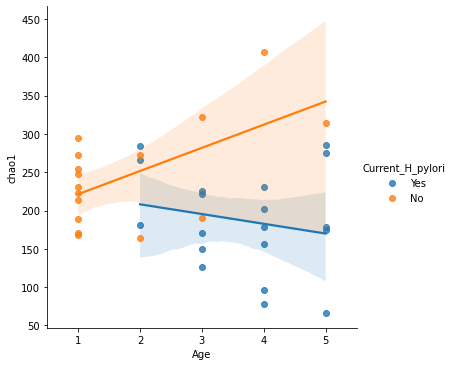

In [29]:
ax = sns.lmplot(x="Age",
               y="chao1",
               hue="Current_H_pylori",
               data = df)
plt.gca().set_xlim((0.5,5.5))

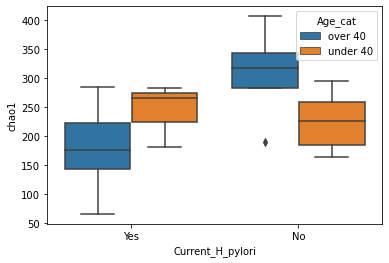

In [27]:
sns.boxplot(x="Current_H_pylori",
            y="chao1",
            hue="Age_cat",
            data=df)

In [28]:
oldH = df.loc[(df["Current_H_pylori"]=="Yes") & 
                    (df["Age_cat"]=="over 40")]
youngH = df.loc[(df["Current_H_pylori"]=="Yes") & 
                     (df["Age_cat"]=="under 40")]
oldnoH = df.loc[(df["Current_H_pylori"]=="No") & 
                    (df["Age_cat"]=="over 40")]

print(f'KS Test: {stats.kstest(oldH["chao1"], "norm")}')

print(f'\nKruskal old vs young H pylori pts: {stats.kruskal(oldH["chao1"], youngH["chao1"])}')

print(f'\nKruskal old H pylori pts vs old no H pylori pts: {stats.kruskal(oldH["chao1"], oldnoH["chao1"])}')

KS Test: KstestResult(statistic=1.0, pvalue=0.0)

Kruskal old vs young H pylori pts: KruskalResult(statistic=2.8125, pvalue=0.09353251268909288)

Kruskal old H pylori pts vs old no H pylori pts: KruskalResult(statistic=6.035714285714278, pvalue=0.014019277113960022)


In [29]:
#THIS SHOULD NOT BE USED, BUT I WAS TRYING (UNSUCCESSFULLY) TO REPRODUCE THE OLD ANALYSIS
stats.ttest_ind(oldH["chao1"],
                youngH["chao1"])

Ttest_indResult(statistic=-1.7088643371254868, pvalue=0.10566732368383726)

In [30]:
noH = df.loc[(df["Current_H_pylori"]=="No")]
H = df.loc[(df["Current_H_pylori"]=="Yes")]

noH_coef = stats.spearmanr(noH["Age"],
                           noH["chao1"])[0]

H_coef = stats.spearmanr(H["Age"],
                         H["chao1"])[0]


z, p = independent_corr(noH_coef,
                        H_coef,
                        noH.shape[0],
                        H.shape[0])
print(f"control correlation coefficient: {noH_coef}\nH pylori correlation coefficient: {H_coef} \nFisher transformation pval: {p}")

control correlation coefficient: 0.43682407611968016
H pylori correlation coefficient: -0.14911925676805737 
Fisher transformation pval: 0.09761432726022878


In [31]:
PPI = df.loc[df["Currppiuse"]=="Y"]
noPPI = df.loc[df["Currppiuse"]=="N"]

(f'KS Test: {stats.kstest(PPI["chao1"], "norm")}')

print(f'\nKruskal PPI vs no PPI: {stats.kruskal(noPPI["chao1"], PPI["chao1"])}')


Kruskal PPI vs no PPI: KruskalResult(statistic=8.816491754122936, pvalue=0.0029852005719257276)


# FINAL ALPHA DIVERSITY FIGURE AND RESULTS
## H pylori vs control
Alpha diversity was lowest in H pylori-positive participants over 40 years old, who had significantly lower chao1 scores from H pylori-negative patients over 40 (Kruskal-Wallis H=6.036, p=0.014) and lower chao1 scores approaching statistical significe when compared to H pylori-positive participants under 40 (Kruskal-Wallis H=2.813, p=0.094). Additionally, the correlation of age with observed otus, faith's phylogenetic diversity, and chao1 was consistently different between H pylori vs control groups, as evidenced by a Fisher transformation on Spearman rank correlation rho values (observed otus: H pylori rho=-0.21 vs control rho=0.50, Fisher p=0.041; Faith: H pylori rho=-0.04 vs control rho=0.57, Fisher p=0.067; chao1: H pylori rho= -0.15 vs control rho=0.44, Fisher p=0.097). 

Shading around the regression lines indicates 95% confidence intervals.

In [32]:
plt.style.use('seaborn-paper')

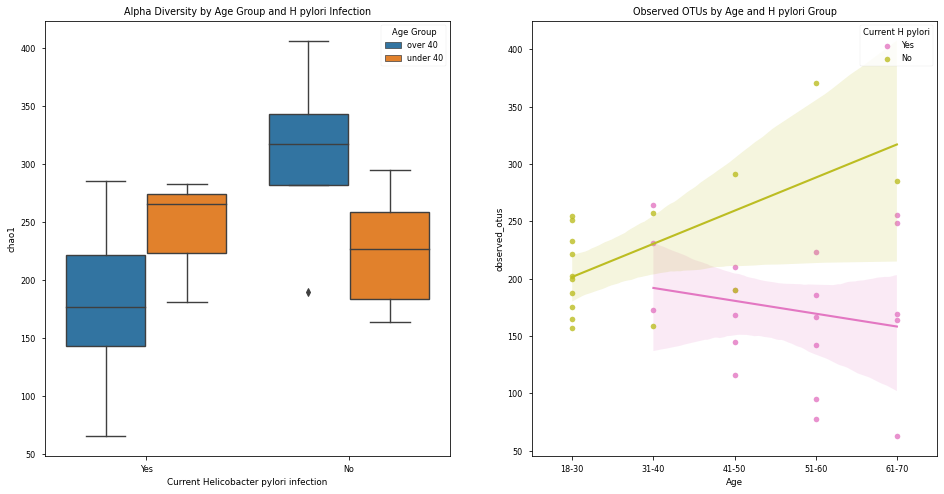

In [33]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

axes[0] = sns.boxplot(x="Current_H_pylori",
            y="chao1",
            hue="Age_cat",
            data=df,
            ax=axes[0])

axes[0].set_xlabel("Current Helicobacter pylori infection")
axes[0].set_title("Alpha Diversity by Age Group and H pylori Infection")
axes[0].legend(title="Age Group", title_fontsize="small")


axes[1] = sns.regplot(x="Age",
                      y="observed_otus",
                      data=otus_full_df[otus_full_df["Current_H_pylori"]=="Yes"],
                      color="tab:pink",
                      ax=axes[1], label="Yes")
axes[1] = sns.regplot(x="Age",
                      y="observed_otus",
                      data=otus_full_df[otus_full_df["Current_H_pylori"]=="No"],
                      color="tab:olive",
                      ax=axes[1], label="No")
axes[1].set_xlim((0.5,5.5))
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title="Current H pylori", title_fontsize="small")
axes[1].set_xticklabels(["0","18-30","31-40","41-50","51-60","61-70"])
axes[1].set_title("Observed OTUs by Age and H pylori Group")

plt.show()

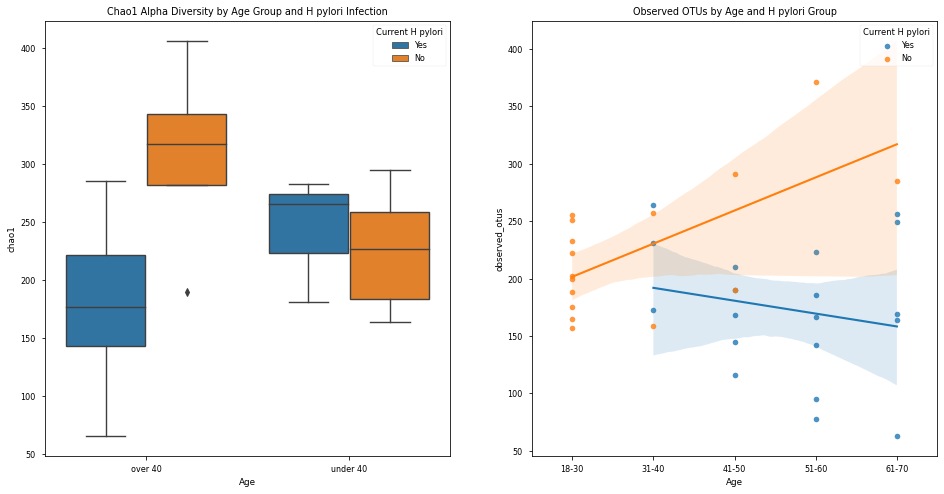

In [34]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

axes[0] = sns.boxplot(x="Age_cat",
            y="chao1",
            hue="Current_H_pylori",
            data=df,
            ax=axes[0])

axes[0].set_xlabel("Age")
axes[0].set_title("Chao1 Alpha Diversity by Age Group and H pylori Infection")
axes[0].legend(title="Current H pylori", title_fontsize="small")


axes[1] = sns.regplot(x="Age",
                      y="observed_otus",
                      data=otus_full_df[otus_full_df["Current_H_pylori"]=="Yes"],
                      color="tab:blue",
                      ax=axes[1], label="Yes")
axes[1] = sns.regplot(x="Age",
                      y="observed_otus",
                      data=otus_full_df[otus_full_df["Current_H_pylori"]=="No"],
                      color="tab:orange",
                      ax=axes[1], label="No")
axes[1].set_xlim((0.5,5.5))
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title="Current H pylori", title_fontsize="small")
axes[1].set_xticklabels(["0","18-30","31-40","41-50","51-60","61-70"])
axes[1].set_title("Observed OTUs by Age and H pylori Group")

plt.show()

In [49]:
print(len(df.loc[(df["Current_H_pylori"]=="Yes") &
                    (df["Age_cat"]=="over 40"),
                 
               "chao1"]))

print(len(df.loc[(df["Current_H_pylori"]=="Yes") &
                    (df["Age_cat"]=="over 40"),
               
                 "chao1"]))

16
4


In [50]:
print(len(df.loc[df["Current_H_pylori"]=="Yes",
                 "chao1"]))

print(len(df.loc[df["Current_H_pylori"]=="No",
                 "chao1"]))

19
16


## PPI use

With an effect size larger than that of H pylori infection, chao1 was significantly different between proton pump inhibitor users and nonusers (Kruskal-Wallis H=8.816, p=0.003).

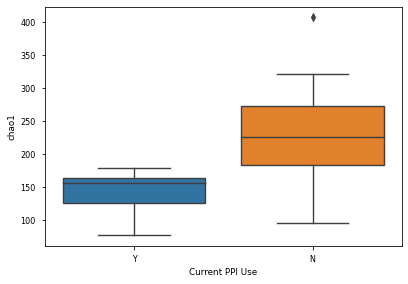

In [35]:
ax = sns.boxplot(x="Currppiuse",
            y="chao1",
            data=df)
ax.set_xlabel("Current PPI Use")
plt.show()

## Further investigation of PPI

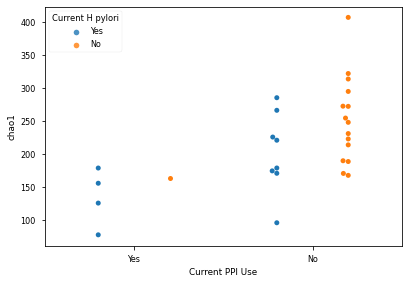

In [41]:
ax = sns.swarmplot(x="Currppiuse",
                 y="chao1",
                 hue="Current_H_pylori",
                 data=df,
                  dodge=True)
ax.set_xlabel("Current PPI Use")
ax.legend(handles, labels, title="Current H pylori", title_fontsize="small")
ax.set_xticklabels(["Yes","No"])
plt.show()

In [46]:
print(len(df.loc[df["Currppiuse"]=="Y",
                 "chao1"]))

print(len(df.loc[df["Currppiuse"]=="N",
                 "chao1"]))

5
23


In [122]:
sum(df["Currppiuse"].isna()) #without data for ppi

7

In [43]:
PPIhpy = df.loc[(df["Current_H_pylori"]=="Yes") &
                (df["Currppiuse"]=="Y"),
               "chao1"]

NoPPIhpy = df.loc[(df["Current_H_pylori"]=="Yes") &
                  (df["Currppiuse"]=="N"),
                 "chao1"]

print(stats.kruskal(PPIhpy,
                    NoPPIhpy,
                    nan_policy="omit"))


KruskalResult(statistic=3.4903846153846203, pvalue=0.061726242335140805)


In [123]:
df[df["Currppiuse"]=="Y"]

,BarcodeSequence,LinkerPrimerSequence,PrimerPlate,Sex,Age,Age_cat,Educ,Race,Residencepastfiveyrs,Whereinusa,...,Abxrespgynpastyear,Abxrespgynuse,Periodontalpastyear,Duodenalulcer,Nonulcerdyspepsia,Samplewell,Description,Current_H_pylori,IBS,chao1
SampleID,,,,,,,,,,,,,,,,,,,,,
21,TAGACCGACTCC,AA,7,M,4,over 40,2,4,1,1.0,...,Y,"1,_3,_4,_8",Y,N,Y,A1,HB21,Yes,No,78.000000
23,TCCGACCCGATC,AA,7,M,4,over 40,2,1,1,1.0,...,Y,"3,_4",N,N,Y,C1,HB23,Yes,No,156.000000
34,TTCCGAATCGGC,AA,7,F,3,over 40,4,4,1,1.0,...,N,0,N,N,N,F2,HB34,Yes,No,126.000000
38,GTCCCAGTCCCA,AA,7,M,5,over 40,2,4,1,1.0,...,N,0,N,N,N,B3,HB38,Yes,No,179.000000
101,CGGTAGTTGATC,AA,7,F,2,under 40,3,3,1,1.0,...,Y,1,Y,N,Y,D3,HBC101,No,No,164.571429


# Beta Diversity

Rerunning this because the beta diversity plots weren't made with the H pylori column in the metadata.

In [414]:
! qiime diversity core-metrics-phylogenetic \
--i-table feature-stats/table.qza \
--i-phylogeny feature-stats/rooted-tree.qza \
--p-sampling-depth 21190 \
--m-metadata-file mapping.tsv \
--output-dir core-metrics-results-2

Saved FeatureTable[Frequency] to: core-metrics-results-2/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results-2/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results-2/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results-2/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results-2/evenness_vector.qza
Saved DistanceMatrix to: core-metrics-results-2/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results-2/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results-2/jaccard_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results-2/bray_curtis_distance_matrix.qza
Saved PCoAResults to: core-metrics-results-2/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: core-metrics-results-2/weighted_unifrac_pcoa_results.qza
Saved PCoAResults to: core-metrics-results-2/jaccard_pcoa_results.qza
Saved PCoAResults to: core-metrics-res

## Adonis
## H pylori

In [170]:
! qiime diversity adonis \
--i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file mapping.tsv \
--p-formula Current_H_pylori  \
--o-visualization core-metrics-results/unweighted-unifrac-Hpylori-adonis.qzv \

Saved Visualization to: core-metrics-results/unweighted-unifrac-Hpylori-adonis.qzv


In [420]:
viz = Visualization.load("core-metrics-results/unweighted-unifrac-Hpylori-adonis.qzv")
viz

<visualization: Visualization uuid: 1dbdb3d3-4fc7-4758-bac1-22990ca668c6>

## H pylori and Age

In [174]:
! qiime diversity adonis \
--i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file mapping.tsv \
--p-formula Current_H_pylori+Age_cat  \
--o-visualization core-metrics-results/unweighted-unifrac-Hpylori_plus_age-adonis.qzv \

Saved Visualization to: core-metrics-results/unweighted-unifrac-Hpylori_plus_age-adonis.qzv


In [173]:
!qiime diversity adonis \
--i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file mapping.tsv \
--p-formula Current_H_pylori*Age_cat  \
--o-visualization core-metrics-results/unweighted-unifrac-Hpylori_age-adonis.qzv \

Saved Visualization to: core-metrics-results/unweighted-unifrac-Hpylori_age-adonis.qzv


# Current PPI use

There are NAs in this column that I have to remove.

In [189]:
df = pd.read_csv("mapping.tsv", sep="\t")

df = df[df["Currppiuse"].isna()==False]

df.to_csv("mapping_no_cppi_na.tsv", sep="\t",
          index=False)

In [190]:
#! qiime diversity adonis \
#--i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
#--m-metadata-file mapping_no_cppi_na.tsv \
#--p-formula Currppiuse \
#--o-visualization core-metrics-results/unweighted-unifrac-Currppi-adonis.qzv \

Plugin error from diversity:

  Missing samples in metadata: {'33', '27', '37', '35', '31', '30', '28'}

Debug info has been saved to /var/folders/t7/vhs8v0wd2xqb851ps1hzn0mm0000gn/T/qiime2-q2cli-err-upugt8lb.log


adonis doesn't like missing samples. I'll just do a permanova.

In [200]:
! qiime diversity beta-group-significance \
--i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file mapping.tsv \
--m-metadata-column Currppiuse \
--o-visualization core-metrics-results/unweighted_unifrac_currppi_permanova.qzv

Saved Visualization to: core-metrics-results/unweighted_unifrac_currppi_permanova.qzv


In [429]:
viz = Visualization.load("core-metrics-results/unweighted_unifrac_currppi_permanova.qzv")
viz

<visualization: Visualization uuid: 731cc799-771c-4f27-b9b9-8dbf09aaa9d9>

PPI use is significant but smaller than H pylori

In [426]:
! qiime diversity beta-group-significance \
--i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file mapping.tsv \
--m-metadata-column Current_H_pylori \
--o-visualization core-metrics-results/unweighted_unifrac_H_pylori_permanova.qzv

Saved Visualization to: core-metrics-results/unweighted_unifrac_H_pylori_permanova.qzv


In [428]:
viz = Visualization.load("core-metrics-results/unweighted_unifrac_H_pylori_permanova.qzv")
viz

<visualization: Visualization uuid: 7b75c5db-565b-491d-b63b-bedbb0887fcd>

# PERMDISP

In [175]:
! qiime diversity beta-group-significance \
--i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file mapping.tsv \
--m-metadata-column Current_H_pylori \
--p-method 'permdisp' \
--o-visualization core-metrics-results/unweighted_unifrac_H_pylori_permdisp.qzv

Saved Visualization to: core-metrics-results/unweighted_unifrac_H_pylori_permdisp.qzv


In [430]:
viz = Visualization.load("core-metrics-results/unweighted_unifrac_H_pylori_permdisp.qzv")
viz

<visualization: Visualization uuid: 4d996658-54ef-4012-a26a-65c84850f280>

In [423]:
! qiime diversity beta-group-significance \
--i-distance-matrix core-metrics-results/weighted_unifrac_distance_matrix.qza \
--m-metadata-file mapping.tsv \
--m-metadata-column Current_H_pylori \
--p-method 'permdisp' \
--o-visualization core-metrics-results/weighted_unifrac_H_pylori_permdisp.qzv

Saved Visualization to: core-metrics-results/weighted_unifrac_H_pylori_permdisp.qzv


In [424]:
viz = Visualization.load("core-metrics-results/weighted_unifrac_H_pylori_permdisp.qzv")
viz

<visualization: Visualization uuid: 3b7d3705-ace7-4314-a23a-a6c1ef1f927e>

# BETA DIVERSITY FINAL FIGURES AND RESULTS

Adonis testing revealed that current H pylori infection represented 7% of the variation in unweighted UniFrac beta diversity (F=2.523, R^2=0.071, p=0.002). Additionally, unweighted UniFrac PERMANOVAs identified significant differences between H pylori vs control participants (F=2.523, p=0.001) and PPI users vs non-users (F=1.939, p=0.012), though the effect size from PPI use was smaller than that of H pylori infection. Furthermore, unweighted UniFrac PERMDISP did not reveal differences in H pylori vs control dispersion (F=0.0506, p=0.809), but weighted UniFrac PERMDISP did (F=6.82955, p=0.017).

Unweighted unifrac PCoA plot of H pylori vs control participants is shown below. Red points represent participants who do not have H pylori, whereas blue points represent participants with H pylori infections 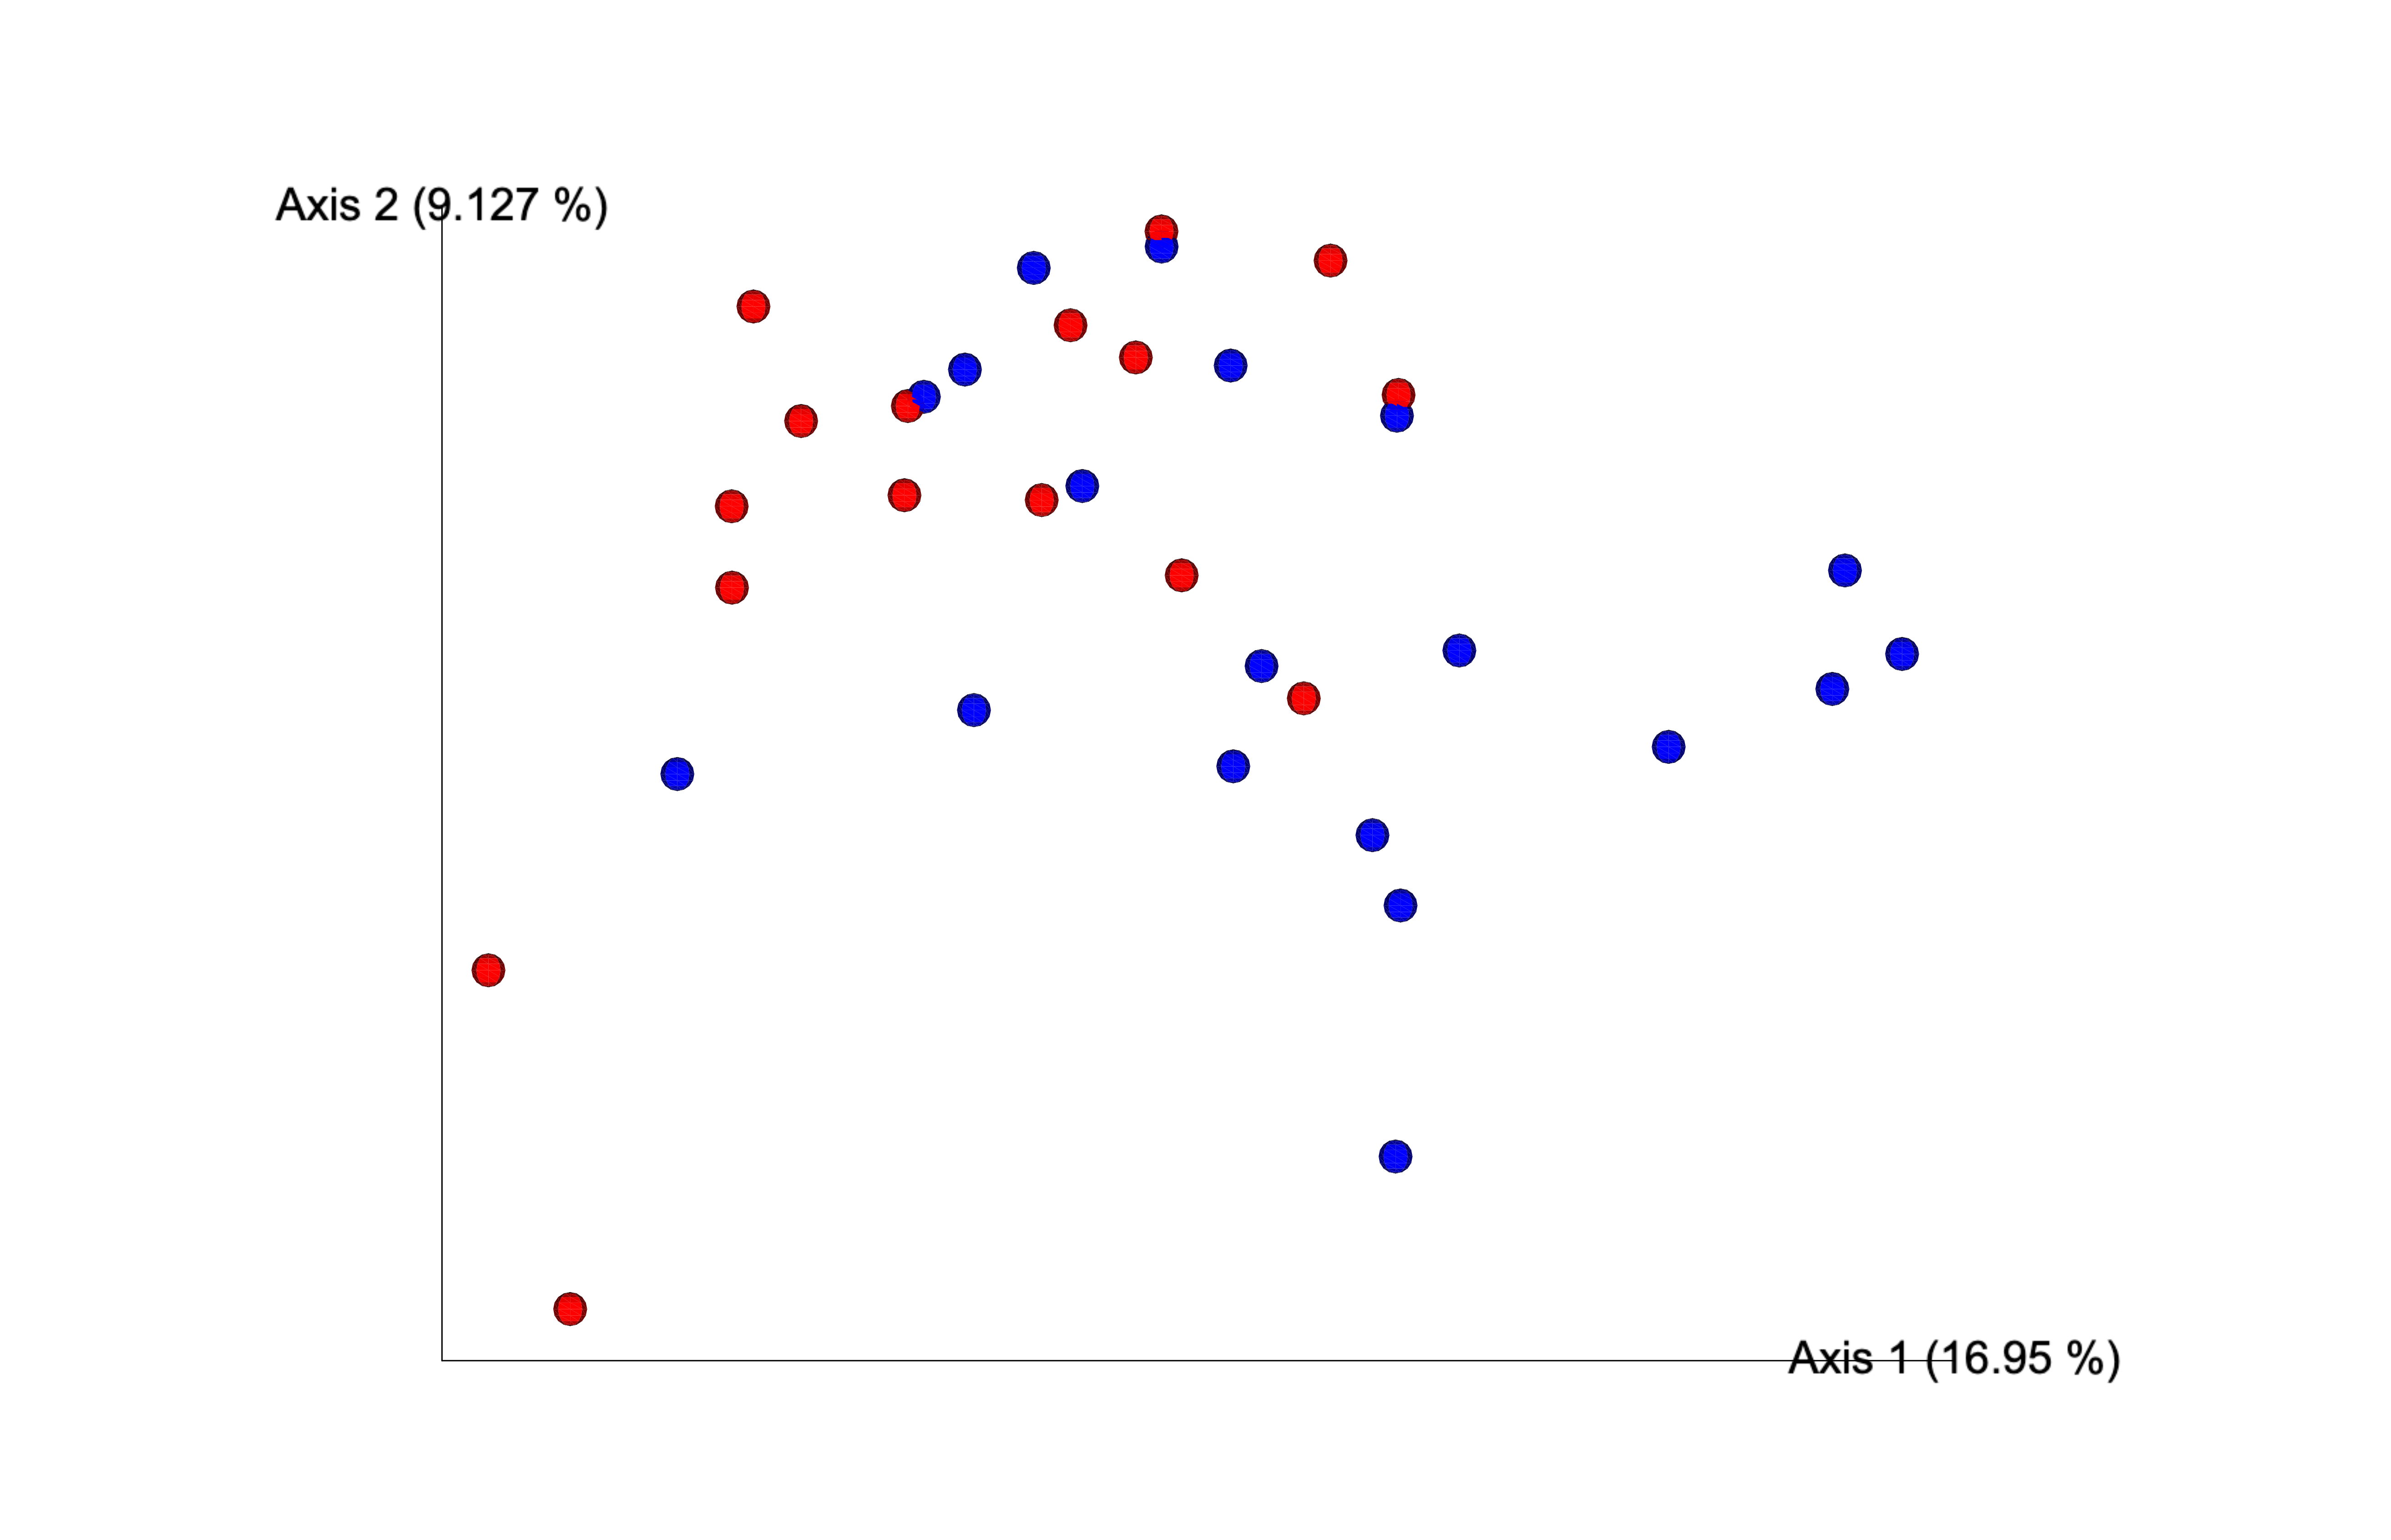

# ANCOM
## Level 6

In [300]:
! qiime composition add-pseudocount \
--i-table feature-stats/table.qza \
--o-composition-table composition-table.qza

Saved FeatureTable[Composition] to: composition-table.qza


In [301]:
! qiime taxa collapse \
  --i-table feature-stats/table.qza \
  --i-taxonomy feature-stats/taxonomy.qza \
  --p-level 6 \
  --o-collapsed-table table-l6.qza

! qiime composition add-pseudocount \
  --i-table table-l6.qza \
  --o-composition-table pseudo-table-l6.qza

Saved FeatureTable[Frequency] to: table-l6.qza
Saved FeatureTable[Composition] to: pseudo-table-l6.qza


In [304]:
! qiime composition ancom \
  --i-table pseudo-table-l6.qza \
  --m-metadata-file mapping.tsv \
  --m-metadata-column Current_H_pylori \
  --o-visualization l6-ancom-Hpy.qzv

Saved Visualization to: l6-ancom-Hpy.qzv


In [307]:
viz = Visualization.load("l6-ancom-Hpy.qzv")
viz

<visualization: Visualization uuid: b905bdc5-5627-420b-a710-2d46a47299a2>

## Level 5

In [305]:
! qiime taxa collapse \
  --i-table feature-stats/table.qza \
  --i-taxonomy feature-stats/taxonomy.qza \
  --p-level 5 \
  --o-collapsed-table table-l5.qza

! qiime composition add-pseudocount \
  --i-table table-l5.qza \
  --o-composition-table pseudo-table-l5.qza

! qiime composition ancom \
  --i-table pseudo-table-l5.qza \
  --m-metadata-file mapping.tsv \
  --m-metadata-column Current_H_pylori \
  --o-visualization l5-ancom-Hpy.qzv

Saved FeatureTable[Frequency] to: table-l5.qza
Saved FeatureTable[Composition] to: pseudo-table-l5.qza
Saved Visualization to: l5-ancom-Hpy.qzv


In [306]:
viz = Visualization.load("l5-ancom-Hpy.qzv")
viz

<visualization: Visualization uuid: 6038e9f6-236f-4461-9a44-372030e2e50b>

# Prep data for LEFSe

In [63]:
tax_df = pd.read_csv("level-7 H pylori.csv",
                    index_col="index")

In [64]:
tax_df.columns = ["|".join(x.split(";")) for x in tax_df.columns]
tax_df = tax_df.loc[:'12'] #columns after this contain no data and are messing things up
tax_df.index = [int(x) for x in tax_df.index]

In [65]:
taxonly_df = tax_df.loc[:,:"k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Verrucomicrobiaceae|g__Akkermansia|s__muciniphila"].drop("Description", axis=1)

In [66]:
for row in taxonly_df.index:
    taxonly_df.loc[row] = taxonly_df.loc[row].apply(lambda x: x/taxonly_df.loc[row].sum())

In [67]:
taxonly_df["Current_H_pylori"] = df["Current_H_pylori"]
taxonly_df["PPI"] = df["Currppiuse"]
taxonly_df["SampleID"] = tax_df["Description"]

In [68]:
taxonly_df.T.to_csv("LEFSe_data.tsv", sep="\t")

In [69]:
taxonly_df.drop("PPI",axis=1).T.to_csv("LEFSe_data_2.tsv", sep="\t")

# LEFSe output

In [108]:
lefse = pd.read_csv("LEfSe_output_2.lefse_internal_res", sep="\t", 
                    header=None)

In [109]:
lefse.head()

,0,1,2,3,4
0,k__Bacteria.p__Firmicutes.c__Bacilli.o__Lactob...,0.000000,NaN,NaN,-
1,k__Bacteria.p__Firmicutes.c__Clostridia.o__SHA_98,1.063470,NaN,NaN,-
2,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clo...,1.878184,NaN,NaN,0.00667483920903
3,k__Bacteria.p__Proteobacteria.c__Betaproteobac...,0.000000,NaN,NaN,-
4,k__Bacteria.p__Proteobacteria.c__Gammaproteoba...,0.000000,NaN,NaN,-


In [110]:
lefse.rename(mapper={0: "Bacteria",
                     1: "Log10(highest class average)",
                     2: "Highest Class",
                     3: "LDA Score (log10)",
                     4: "p value"},
             axis=1, inplace=True)

In [111]:
lefse.head()

,Bacteria,Log10(highest class average),Highest Class,LDA Score (log10),p value
0,k__Bacteria.p__Firmicutes.c__Bacilli.o__Lactob...,0.000000,NaN,NaN,-
1,k__Bacteria.p__Firmicutes.c__Clostridia.o__SHA_98,1.063470,NaN,NaN,-
2,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clo...,1.878184,NaN,NaN,0.00667483920903
3,k__Bacteria.p__Proteobacteria.c__Betaproteobac...,0.000000,NaN,NaN,-
4,k__Bacteria.p__Proteobacteria.c__Gammaproteoba...,0.000000,NaN,NaN,-


In [112]:
lefse["Enriched in"] = lefse["Highest Class"].apply(lambda x: "Control group" if x=="No" else "H pylori group")

In [113]:
def split_taxlevel(x, splitter="__"):
    mapper={"k":"kingdom",
            "p":"phylum",
            "c":"class",
            "o":"order",
            "f":"family",
            "g":"genus",
            "s":"species"}
    
    return ": ".join([mapper[x.split(splitter)[0]],x.split(splitter)[-1]])

def make_plotnames(x):
    
    try: 
        name = split_taxlevel(x.split(".")[-1])
    except KeyError:
        try:
            name = split_taxlevel(x.split(".")[-2])
        except KeyError:
            try:
                name = split_taxlevel(x.split(".")[-3])
            except KeyError:
                try:
                    name = split_taxlevel(x.split(".")[-4])
                except KeyError:
                    name = np.nan
                    
    if name == 'species: ':
        name = split_taxlevel(x.split(".")[-2])
    if name == 'genus: ':
        name = split_taxlevel(x.split(".")[-3])
        
        
    return name

In [114]:
#65 is f_21, which was just giving trouble
lefse["plotnames"] = lefse["Bacteria"].drop(65).apply(func=lambda x: make_plotnames(x))

In [115]:
def taxonomy_splitter(fulltax, splitter="; "):
    fulltax = [x[3:] for x in fulltax.split(splitter)]
    try:
        domain = fulltax[0]
    except IndexError:
        domain = 'NA'
        
    try:
        phylum = fulltax[1]
    except IndexError:
        phylum = 'NA'
        
    try:
        clas = fulltax[2]
    except IndexError:
        clas = 'NA'
    
    try:
        order = fulltax[3]
    except IndexError:
        order = 'NA'
        
    try:
        family = fulltax[4]
    except IndexError:
        family = 'NA'
        
    try:
        genus = fulltax[5]
    except IndexError:
        genus = 'NA'
    
    try:
        species = fulltax[6]
    except IndexError:
        species = 'NA'
        
    return domain, phylum, clas, order, family, genus, species

In [116]:
lefse['tax_split'] =lefse['Bacteria'].apply(taxonomy_splitter, splitter=".")

lefse['Domain'] = lefse['tax_split'].apply(lambda x: x[0])
lefse['Phylum'] = lefse['tax_split'].apply(lambda x: x[1])
lefse['Class'] = lefse['tax_split'].apply(lambda x: x[2])
lefse['Order'] = lefse['tax_split'].apply(lambda x: x[3])
lefse['Family'] = lefse['tax_split'].apply(lambda x: x[4])
lefse['Genus'] = lefse['tax_split'].apply(lambda x: x[5])
lefse['Species'] = lefse['tax_split'].apply(lambda x: x[6])
lefse.drop('tax_split', axis=1, inplace=True)

lefse.loc[lefse["Highest Class"]=="Yes","LDA Score (log10)"] = lefse.loc[lefse["Highest Class"]=="Yes","LDA Score (log10)"].apply(lambda x: -1*x)
lefse.sort_values("LDA Score (log10)", ascending=True, inplace=True)

In [117]:
lefse.head()

,Bacteria,Log10(highest class average),Highest Class,LDA Score (log10),p value,Enriched in,plotnames,Domain,Phylum,Class,Order,Family,Genus,Species
65,f_21,5.986122,Yes,-4.767687,0.000289498984701,H pylori group,NaN,1,NA,NA,NA,NA,NA,NA
62,k__Bacteria.p__Actinobacteria.c__Coriobacterii...,0.000000,Yes,-2.802101,0.0347853344917,H pylori group,genus: Atopobium,Bacteria,Actinobacteria,Coriobacteriia,Coriobacteriales,Coriobacteriaceae,Atopobium,
126,k__Bacteria.p__Firmicutes.c__Bacilli.o__Gemell...,0.000000,Yes,-2.736820,0.0424859334425,H pylori group,family: Gemellaceae,Bacteria,Firmicutes,Bacilli,Gemellales,Gemellaceae,,NA
445,k__Bacteria.p__Firmicutes.c__Bacilli.o__Gemell...,0.000000,Yes,-2.501829,0.0424859334425,H pylori group,family: Gemellaceae,Bacteria,Firmicutes,Bacilli,Gemellales,Gemellaceae,,
40,k__Bacteria.p__Actinobacteria.c__Actinobacteri...,0.000000,Yes,-2.468289,0.0377653981206,H pylori group,family: Micrococcaceae,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Micrococcaceae,NA,NA


# LEFSE PLOTS AND RESULTS

The first following plot shows the LEfSe Scores for Taxa that were differentially distributed across H pylori vs control patients via Kruskall-Wallis and Wilcoxon tests with $\alpha$=0.05. Negative values represent taxa that were enriched in H pylori-positive participants, whereas positive values represent taxa that were enriched in H pylori-negative participants. Color represents the phylum.

The second plot below shows the arcsin square root transformed relative abundances of each phylum, grouped by H pylori/no H pylori.


Notes from the LEfSe website:
- Step 1: the Kruskall-Wallis test analyzes all features, testing whether the values in different classes are differentially distributed. Features violating the null hypothesis are further analyzed in Step 2.
- Step 2: the pairwise Wilcoxon test checks whether all pairwise comparisons between subclasses within different classes significantly agree with the class level trend.
- Step 3: the resulting subset of vectors is used to build a Linear Discriminant Analysis model from which the relative difference among classes is used to rank the features. The final output thus consists of a list of features that are discriminative with respect to the classes, consistent with the subclass grouping within classes, and ranked according to the effect size with which they differentiate classes.

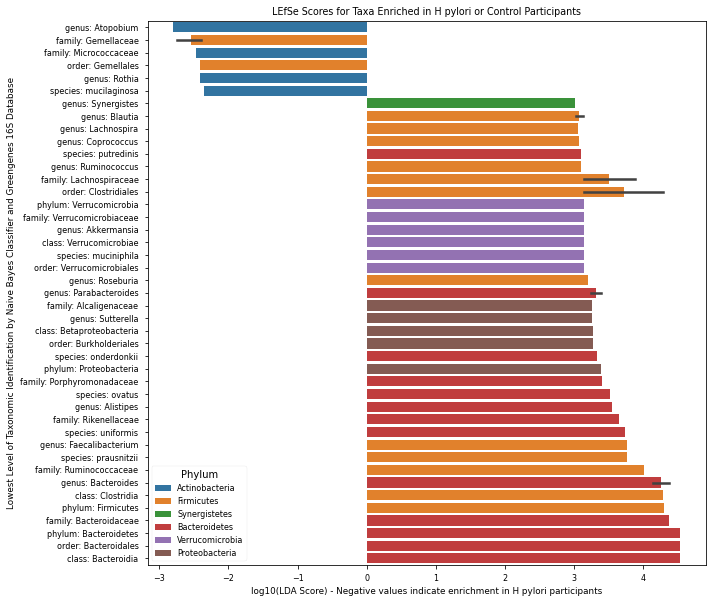

In [119]:
ax = sns.barplot(y="plotnames",
                 x="LDA Score (log10)",
                 hue = "Phylum",
                 data = lefse[((lefse["LDA Score (log10)"] > 3) | (lefse["LDA Score (log10)"] < 0)) & 
                              (lefse["Phylum"]!="NA")], 
                 dodge=False,)

ax.set_ylabel("Lowest Level of Taxonomic Identification by Naive Bayes Classifier and Greengenes 16S Database")
ax.set_title("LEfSe Scores for Taxa Enriched in H pylori or Control Participants")
ax.set_xlabel("log10(LDA Score) - Negative values indicate enrichment in H pylori participants")
plt.gcf().set_size_inches(10,10)
plt.show()

In [107]:
taxonly_df.loc["taxonomy"] = taxonly_df.columns
taxonly_df.loc["tax_split"] = taxonly_df.loc["taxonomy"].apply(taxonomy_splitter, splitter="|")

taxonly_df.loc['Domain'] = taxonly_df.loc['tax_split'].apply(lambda x: x[0])
taxonly_df.loc['Phylum'] = taxonly_df.loc['tax_split'].apply(lambda x: x[1])
taxonly_df.loc['Class'] = taxonly_df.loc['tax_split'].apply(lambda x: x[2])
taxonly_df.loc['Order'] = taxonly_df.loc['tax_split'].apply(lambda x: x[3])
taxonly_df.loc['Family'] = taxonly_df.loc['tax_split'].apply(lambda x: x[4])
taxonly_df.loc['Genus'] = taxonly_df.loc['tax_split'].apply(lambda x: x[5])
taxonly_df.loc['Species'] = taxonly_df.loc['tax_split'].apply(lambda x: x[6])
taxonly_df.drop('tax_split', inplace=True)

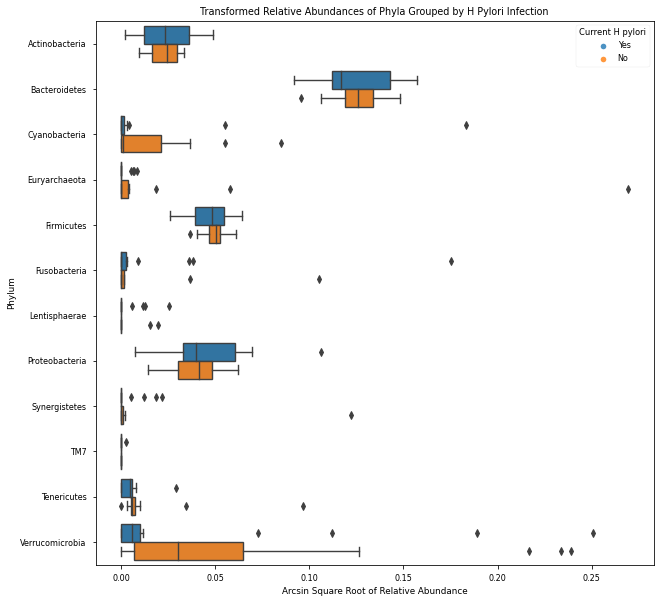

In [82]:
by_phylum = taxonly_df.iloc[:-8,:-3].astype(float).groupby(taxonly_df.loc["Phylum"], axis=1).mean()
by_phylum = pd.concat([by_phylum, taxonly_df["Current_H_pylori"]], axis=1)
melted = pd.melt(by_phylum, id_vars="Current_H_pylori")
melted["arcsin sqrt relative abundance"] = melted["value"].apply(lambda x: np.arcsin(np.sqrt(x)))

ax = sns.boxplot(x="arcsin sqrt relative abundance",
                y="variable",
                hue="Current_H_pylori",
                data=melted[(melted["variable"]!="")&
                            ((melted["Current_H_pylori"]=="Yes") | (melted["Current_H_pylori"]=="No"))],
                dodge=1)

ax.set_title("Transformed Relative Abundances of Phyla Grouped by H Pylori Infection")
ax.set_xlabel("Arcsin Square Root of Relative Abundance")
ax.set_ylabel("Phylum")
ax.legend(handles, labels, title="Current H pylori", title_fontsize="small")
plt.gcf().set_size_inches(10,10)
plt.show()

In [89]:
stats.kruskal(by_phylum.loc[by_phylum["Current_H_pylori"]=="Yes",
                            "Verrucomicrobia"],
        
               by_phylum.loc[by_phylum["Current_H_pylori"]=="No",
                            "Verrucomicrobia"])

KruskalResult(statistic=4.4549235993208915, pvalue=0.03480077290163392)

# Procrustes
## Load data

In [949]:
metabo = pd.read_csv("metabolomics_data.csv", index_col="Sample")

In [950]:
metabo.head()

,Sample Weight,Date and Time,myristic acid (14:0) (weight corrected µg/g),myristoleic acid (14:1n5) (weight corrected µg/g),pentadecanoic acid (15:0) (weight corrected µg/g),palmitic acid (16:0) (weight corrected µg/g),palmitoleic acid (16:1n7) (weight corrected µg/g),margaric acid (17:0) (weight corrected µg/g),stearic acid (18:0) (weight corrected µg/g),oleic acid (18:1n9) (weight corrected µg/g),...,cis-13-16-docosadienoic acid (22:2n6) (weight corrected µg/g),adrenic acid (22:4n6) (weight corrected µg/g),osbond acid (22:5n6) (weight corrected µg/g),docosapentaenoic acid (22:5n3) (weight corrected µg/g),docosahexaenoic acid (22:6n3) (weight corrected µg/g),lignoceric acid (24:0) (weight corrected µg/g),nervonic acid (24:1n9) (weight corrected µg/g),Unnamed: 33,Unnamed: 34,Unnamed: 35
Sample,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LLOQ,(mg),NaN,1.600,0.960,0.960,12.80,1.60,1.60,6.40,12.8,...,0.960,0.960,0.960,1.60,3.20,0.960,1.60,NaN,NaN,NaN
ULOQ,NaN,NaN,240.000,144,144.000,1920.00,240,240,960.00,1920,...,144,144,144,240,480,144,240,NaN,NaN,NaN
Preservative,109.8,9/4/20 15:05,0.126,NQ,0.234,8.51,NQ,NQ,2.86,NQ,...,NQ,NQ,NQ,NQ,NQ,NQ,NQ,NaN,NaN,NaN
HB 21,102.3,9/4/20 15:37,4.890,0.216,4.760,172.00,2.22,1.90,89.30,141,...,NQ,0.762,15.7,1.17,2.80,1.86,0.528,NaN,NaN,NaN


## Format data

In [951]:
metabo = metabo.iloc[4:-2]

In [952]:
for col in metabo.columns:
    metabo.loc[:,col] = pd.to_numeric(metabo.loc[:,col], errors="coerce")
    
metabo = metabo.fillna(0)

metabo.drop(["Sample Weight", "Date and Time", "Unnamed: 33", "Unnamed: 34", "Unnamed: 35"], axis=1, inplace=True)

In [953]:
metabo.head()

,myristic acid (14:0) (weight corrected µg/g),myristoleic acid (14:1n5) (weight corrected µg/g),pentadecanoic acid (15:0) (weight corrected µg/g),palmitic acid (16:0) (weight corrected µg/g),palmitoleic acid (16:1n7) (weight corrected µg/g),margaric acid (17:0) (weight corrected µg/g),stearic acid (18:0) (weight corrected µg/g),oleic acid (18:1n9) (weight corrected µg/g),vaccenic acid (18:1n7) (weight corrected µg/g),linoleic acid (18:2n6) (weight corrected µg/g),...,eicosapentaenoic acid (20:5n3) (weight corrected µg/g),behenic acid (22:0) (weight corrected µg/g),erucic acid (22:1n9) (weight corrected µg/g),cis-13-16-docosadienoic acid (22:2n6) (weight corrected µg/g),adrenic acid (22:4n6) (weight corrected µg/g),osbond acid (22:5n6) (weight corrected µg/g),docosapentaenoic acid (22:5n3) (weight corrected µg/g),docosahexaenoic acid (22:6n3) (weight corrected µg/g),lignoceric acid (24:0) (weight corrected µg/g),nervonic acid (24:1n9) (weight corrected µg/g)
Sample,,,,,,,,,,,,,,,,,,,,,
HB 21,4.89,0.216,4.76,172.0,2.220,1.90,89.3,141.0,6.00,313.0,...,0.398,3.45,1.020,0.0,0.762,15.70,1.17,2.800,1.86,0.528
HB 22,3.49,0.000,2.49,148.0,0.578,2.88,156.0,38.2,4.20,20.5,...,0.000,2.23,0.317,0.0,0.000,0.00,0.00,0.000,1.19,0.190
HB 23,37.20,0.497,8.26,1088.0,8.070,12.70,986.0,232.0,29.90,64.9,...,17.900,7.57,0.629,0.0,0.466,16.80,6.91,13.400,3.52,2.680
HB 24,55.20,0.394,12.10,794.0,3.870,15.70,426.0,104.0,20.20,47.9,...,0.962,4.01,0.901,0.0,1.980,0.00,1.52,2.340,3.13,0.939
HB 25,2.26,0.000,8.88,64.0,4.050,1.93,41.0,82.3,7.95,27.5,...,0.748,3.46,1.420,0.0,0.857,5.72,6.11,0.673,3.54,1.320


## Load tax data to compare

In [954]:
taxonly_2 = taxonly_df.set_index(taxonly_df["SampleID"]).iloc[:-8,:-3]
taxonly_2.index

Index(['HB21', 'HB22', 'HB23', 'HB24', 'HB25', 'HB26', 'HB27', 'HB28', 'HB29',
       'HB30', 'HB31', 'HB32', 'HB33', 'HB34', 'HB35', 'HB36', 'HB37', 'HB38',
       'HB39', 'HBC101', 'HBC102', 'HBC103', 'CC01', 'IBSCtrl01', 'IBSCtrl02',
       'IBSCtrl03', 'IBSCtrl04', 'IBSCtrl05', 'IBSCtrl06', 'IBSCtrl07',
       'IBSCtrl08', 'IBSCtrl09', 'IBSCtrl10', 'IBSCtrl11', 'IBSCtrl12'],
      dtype='object', name='SampleID')

In [955]:
metabo.index

Index(['HB 21', 'HB 22', 'HB 23', 'HB 24', 'HB 25', 'HB 26', 'HB 27', 'HB 28',
       'HB 29', 'HB 30', 'HB x31', 'HB 32', 'HB 33', 'HB 34', 'HB 35', 'HB 36',
       'HB 37', 'HB 38', 'HB 39', 'HBC 101', 'HBC 102', 'HBC 103', 'CC 01',
       'IBS control 1', 'IBS  control 2', 'IBS control 3', 'IBS control 4',
       'IBS control 5', 'IBS control 6', 'IBS control 7', 'IBS control 8',
       'IBS control 9', 'IBS Ctl10', 'IBS Ctl11', 'IBS Ctl12', 'IBS M1',
       'IBS M2', 'IBS M7', 'IBS M9', 'IBS D4', 'IBS D5', 'IBS D6', 'IBS D9',
       'IBS C1', 'IBS Consti3', 'IBS Const 5', 'IBS N1', 'IBS N2', 'IBS N3',
       'IBS N4', 'IBS N5', 'IBS N6', 'IBS N7', 'IBS N8', 'IBS N9', 'IBS N10',
       'IBS N11', 'IBS N12', 'IBS N13', 'IBS N14', 'IBS N15', 'IBS N16',
       'IBS N17', 'IBS N18', 'IBS N19', 'IBS N20', 'IBS N121', 'IBS N22'],
      dtype='object', name='Sample')

So it looks like the sample IDs are formatted differently, and metabo has extra... I'll add the sample IDs from the tax to metabolomics and then filter down from there

In [989]:
metabo["SampleID"] = [n for n in taxonly_2.index] + [np.nan for n in range(metabo.shape[0]-taxonly_2.shape[0])]
metabo = metabo[metabo["SampleID"].isna()==False]
metabo.set_index("SampleID", inplace=True)

In [991]:
metabo.head()

,myristic acid (14:0) (weight corrected µg/g),myristoleic acid (14:1n5) (weight corrected µg/g),pentadecanoic acid (15:0) (weight corrected µg/g),palmitic acid (16:0) (weight corrected µg/g),palmitoleic acid (16:1n7) (weight corrected µg/g),margaric acid (17:0) (weight corrected µg/g),stearic acid (18:0) (weight corrected µg/g),oleic acid (18:1n9) (weight corrected µg/g),vaccenic acid (18:1n7) (weight corrected µg/g),linoleic acid (18:2n6) (weight corrected µg/g),...,eicosapentaenoic acid (20:5n3) (weight corrected µg/g),behenic acid (22:0) (weight corrected µg/g),erucic acid (22:1n9) (weight corrected µg/g),cis-13-16-docosadienoic acid (22:2n6) (weight corrected µg/g),adrenic acid (22:4n6) (weight corrected µg/g),osbond acid (22:5n6) (weight corrected µg/g),docosapentaenoic acid (22:5n3) (weight corrected µg/g),docosahexaenoic acid (22:6n3) (weight corrected µg/g),lignoceric acid (24:0) (weight corrected µg/g),nervonic acid (24:1n9) (weight corrected µg/g)
SampleID,,,,,,,,,,,,,,,,,,,,,
HB21,4.89,0.216,4.76,172.0,2.220,1.90,89.3,141.0,6.00,313.0,...,0.398,3.45,1.020,0.0,0.762,15.70,1.17,2.800,1.86,0.528
HB22,3.49,0.000,2.49,148.0,0.578,2.88,156.0,38.2,4.20,20.5,...,0.000,2.23,0.317,0.0,0.000,0.00,0.00,0.000,1.19,0.190
HB23,37.20,0.497,8.26,1088.0,8.070,12.70,986.0,232.0,29.90,64.9,...,17.900,7.57,0.629,0.0,0.466,16.80,6.91,13.400,3.52,2.680
HB24,55.20,0.394,12.10,794.0,3.870,15.70,426.0,104.0,20.20,47.9,...,0.962,4.01,0.901,0.0,1.980,0.00,1.52,2.340,3.13,0.939
HB25,2.26,0.000,8.88,64.0,4.050,1.93,41.0,82.3,7.95,27.5,...,0.748,3.46,1.420,0.0,0.857,5.72,6.11,0.673,3.54,1.320


In [1155]:
from scipy.spatial import distance
from sklearn import manifold
from scipy.spatial import procrustes
from skbio import DistanceMatrix

In [1222]:
metabo_braycurt = pd.DataFrame(distance.cdist(metabo,
                                         metabo,
                                         "braycurtis"),
                           index=metabo.index,
                           columns=metabo.index)

tax_braycurt = pd.DataFrame(distance.cdist(taxonly_2,
                                           taxonly_2,
                                           "braycurtis"),
                           index=taxonly_2.index,
                           columns=taxonly_2.index)

In [1230]:
mdsa = manifold.MDS(dissimilarity="precomputed", random_state=42)
mdsb = manifold.MDS(dissimilarity="precomputed", random_state=42)

mds_metabo = pd.DataFrame(mdsa.fit_transform(metabo_braycurt),
                     index=metabo.index,
                     columns=["MDS1","MDS2"])

mds_tax = pd.DataFrame(mdsb.fit_transform(tax_braycurt),
                     index=taxonly_2.index,
                     columns=["MDS1","MDS2"])

In [1241]:
metabo_stress = np.sqrt(mdsa.stress_ / (0.5 * np.sum(metabo_braycurt.values**2)))
tax_stress = np.sqrt(mdsb.stress_ / (0.5 * np.sum(tax_braycurt.values**2)))

print(f"Kruskal's stress for metabolomics ordination: {metabo_stress} \n")
print(f"Kruskal's stress for taxonomy bray curtis ordination: {tax_stress} \n")

Kruskal's stress for metabolomics ordination: 0.16359816059738816 

Kruskal's stress for taxonomy bray curtis ordination: 0.2681437610165676 



This stress value is a bit higher that we'd like to see for the microbiome data, but that could be a result of dataset size, so I wouldn't give it too much thought.

In [1280]:
mtx1, mtx2, disparity = procrustes(mds_metabo,
                                   mds_tax)
print(f'disparity: {disparity}')


disparity: 0.8635482216594177


In [1291]:
["hotdog"]*3 + ["bun"]*3

['hotdog', 'hotdog', 'hotdog', 'bun', 'bun', 'bun']

In [1343]:
proplot = pd.concat([pd.DataFrame(mtx1),
                     pd.DataFrame(mtx2)])
proplot.columns = ["MDS1","MDS2"]
proplot["Dataset"] = ["metabolome"]*35 + ["microbiome"]*35

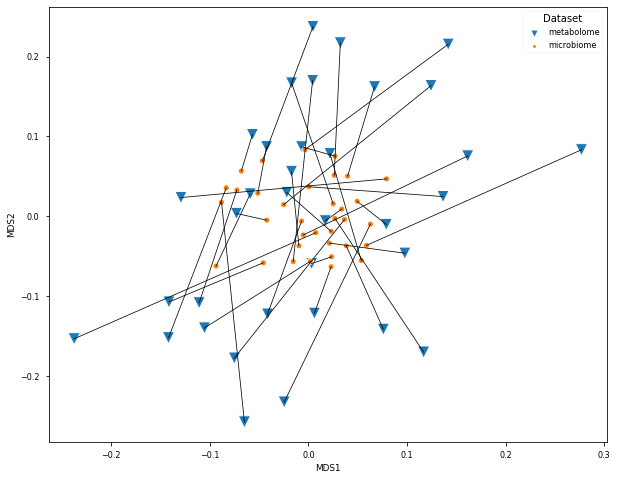

In [1352]:
ax = sns.scatterplot(x="MDS1",y="MDS2",
                     style="Dataset",hue="Dataset",
                     data=proplot,
                     markers=["v","."],
                     s=150)

for i in range(len(mtx1)):
    plt.plot([mtx1[i,0],mtx2[i,0]],
             [mtx1[i,1],mtx2[i,1]],
             c="black", linewidth=0.75)
    
plt.gcf().set_size_inches(10,8)

plt.savefig("procrustes-fig.png")

In [1310]:
for i in range(len(mtx1)):
    dx = mtx1[i,0]-mtx2[i,0]
    dy = mtx1[i,1]-mtx2[i,1]
    plt.Arrow(x=mtx1[i,0],
              y=mtx1[i,1],
              dx=dx,
              dy=dy)

## Randomly sample both

In [1237]:
rows, cols = metabo.shape
n=10000

disparities = []
for x in range(n):
    metabo_rand = mds_metabo.sample(frac=1,axis=0).reset_index(drop=True)
    tax_rand = mds_tax.sample(frac=1,axis=0).reset_index(drop=True)
    
    mtx1_rand, mtx2_rand, disparity_rand = procrustes(metabo_rand,
                                                      tax_rand)
    disparities.append(disparity_rand)

pval = (sum([disparity > d for d in disparities])+1)/(n+1)

print(f'Procrustean randomization test pval: {pval}')

Procrustean randomization test pval: 0.0165983401659834


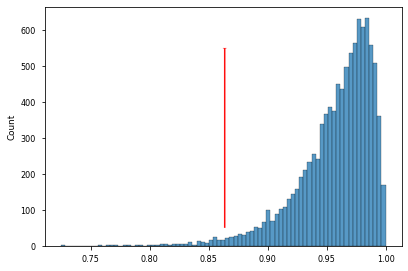

In [1238]:
ax = sns.histplot(disparities)
ax.arrow(disparity,50,
         0,500,
         width=0.001,
         color="red") 

## Randomly sample one

In [1239]:
rows, cols = metabo.shape
n=10000

disparities = []
for x in range(n):
    metabo_rand = mds_metabo.sample(frac=1,axis=0).reset_index(drop=True)
    
    mtx1_rand, mtx2_rand, disparity_rand = procrustes(metabo_rand,
                                                      mds_tax)
    disparities.append(disparity_rand)

pval = (sum([disparity > d for d in disparities])+1)/(n+1)

print(f'Procrustean randomization test pval: {pval}')

Procrustean randomization test pval: 0.0165983401659834


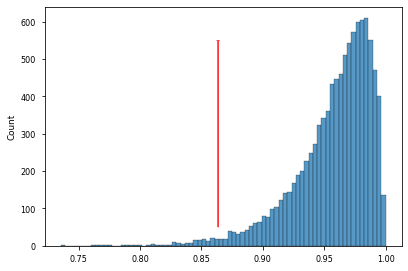

In [1240]:
ax = sns.histplot(disparities)
ax.arrow(disparity,50,
         0,500,
         width=0.001,
         color="red") 

# Mantel

In [1012]:
from skbio.stats.distance import mantel

In [1018]:
coef, p, n = mantel(metabo_braycurt,
                   tax_braycurt,
                   method="spearman")

print(f'pval: {p} \ncoef: {coef}')

pval: 0.505 
coef: 0.05292545328076321


# Volcano plot

In [1085]:
metaboresults = pd.read_csv("metaboresults.csv").T
metaboresults.columns= metaboresults.loc["Unnamed: 0"]
metaboresults.drop("Unnamed: 0", inplace=True)
metaboresults.iloc[:,1:-1] = metaboresults.iloc[:,1:-1].astype(float)
metaboresults["pathway"].fillna("NA", inplace=True)

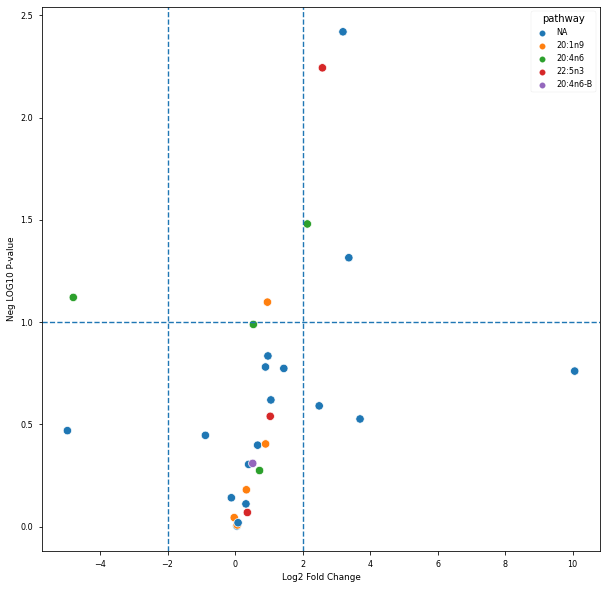

In [1114]:
ax = sns.scatterplot(x="Log2 Fold Change",
                y="Neg LOG10 P-value",
                hue="pathway",
                data=metaboresults,
                s=70)
plt.gcf().set_size_inches(10,10)
ax.axhline(y=1, ls="--")
ax.axvline(x=2, ls="--")
ax.axvline(x=-2, ls="--")

In [1101]:
def lipid_type_splitter(x):
    unsaturated_Cs = int(x.split(':')[1][0])
    if unsaturated_Cs == 0:
        return "saturated"
    elif unsaturated_Cs == 1:
        return "monounsaturated"
    else:
        return "polyunsaturated"

In [1103]:
metaboresults.loc[:,"Lipid Type"] = metaboresults.loc[:,"Fatty Acid"].apply(lipid_type_splitter)

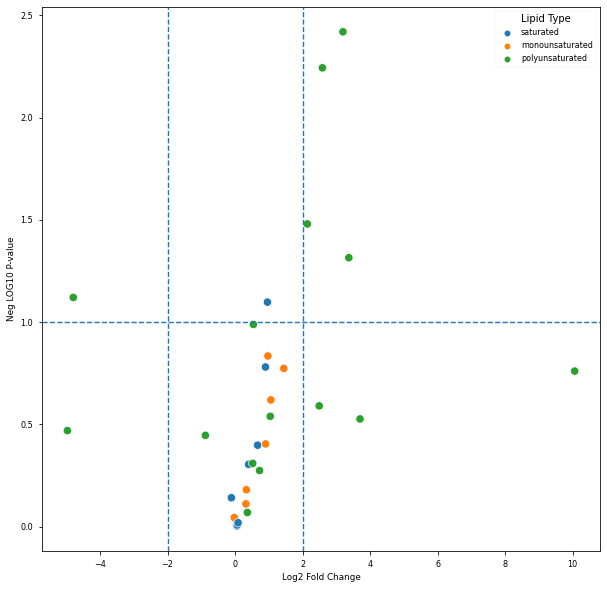

In [1112]:
ax = sns.scatterplot(x="Log2 Fold Change",
                y="Neg LOG10 P-value",
                hue="Lipid Type",
                data=metaboresults,
                s=70)
plt.gcf().set_size_inches(10,10)
ax.axhline(y=1, ls="--")
ax.axvline(x=2, ls="--")
ax.axvline(x=-2, ls="--")